In [21]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
from control import bode, tf
from control.matlab import logspace, feedback, step, nyquist

from for_plot import bodeplot_set, plot_set

In [2]:
s=tf("s")
M=1
Pn =1/(M*s**2)

In [3]:
def fgain(alpha, M, s):
    return alpha**2*M - 2*alpha*M*s/(0.01*s+1)

In [4]:
K1 = fgain(-0.5, M, s)
K2 = fgain(-2.5, M, s)

In [6]:
Tn1 = feedback(Pn*K1, 1)
Tn2 = feedback(Pn*K2, 1)

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


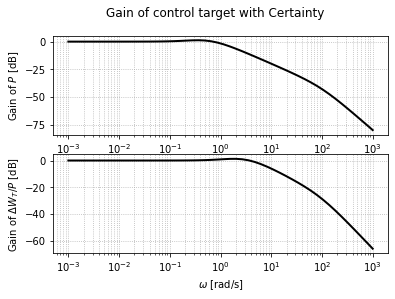

In [9]:
fig, ax = plt.subplots(2, 2)

gain, _, w = bode(Tn1, logspace(-3, 3), Plot = False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=2)
gain, _, w = bode(Tn2, logspace(-3, 3), Plot = False)
ax[1].semilogx(w, 20*np.log10(gain), color='k', lw=2)

bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')

fig.suptitle("Gain of control target with Certainty")
plt.show()

In [12]:
def _make_model(M, m1_n, m1_var_p, k_n, k_var_p, c_n, c_var_p,s):
    m1 = m1_n * (1+np.random.rand()*2*m1_var_p-m1_var_p)
    k = k_n *(1+ np.random.rand()*2*k_var_p-k_var_p)
    c = c_n *(1+ np.random.rand()*2*c_var_p-c_var_p)
    m2 = M-m1
    P = (c*s+k)/(s**2*(m1*m2*s**2+(m1+m2)*c*s+(m1+m2)*k))
    return P


C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureW

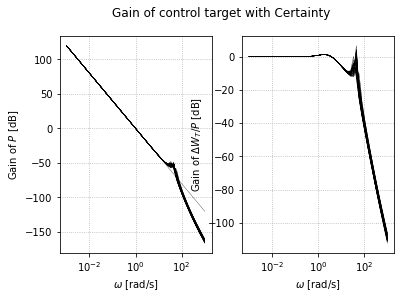

In [15]:
fig, ax = plt.subplots(1, 2)

for i in range(50):
    #不確かさをもつ制御対象
    P = _make_model(M, 0.8, 0.1, 300, 0.1, 1, 0.1,s)
    T1 = feedback(P*K1, 1)
    gain, _, w = bode(P, logspace(-3, 3), Plot = False)
    ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
    T2 = feedback(P*K2, 1)
    gain, _, w = bode(T2, logspace(-3, 3), Plot = False)
    ax[1].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)   
gain, _, w = bode(Pn, logspace(-3, 3), Plot = False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)  
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')

fig.suptitle("Gain of control target with Certainty")
plt.show()

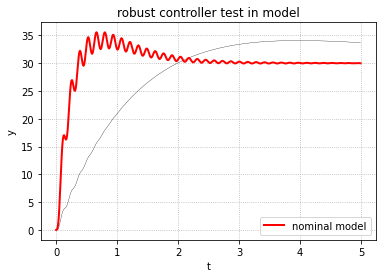

In [20]:
###設計した制御器の性能確認
fig, ax = plt.subplots()
Gyr = feedback(P*K1, 1)
ref = 30      #目標値30
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='k', lw=0.3)

#ノミナルモデル（不確かさなし）に対する性能
Gyr = feedback(P*K2, 1)
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='r', lw=2, label="nominal model")
ax.legend()
plot_set(ax, 't', 'y')

ax.set_title("robust controller test in model")
plt.show()

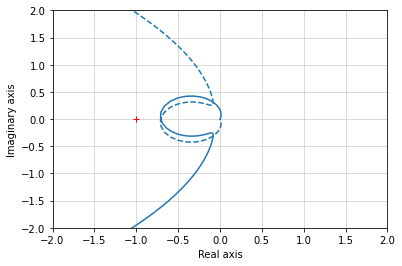

In [29]:
nyquist(P*K2)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

In [31]:
def _make_notch(s, w, gz, d):
    non = s**2 +2*gz*w*d*s+w**2
    den = s**2+2*gz*w*s+w**2
    return non/den

In [73]:
N = _make_notch(s, 52, 0.35, 0.5)

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureW

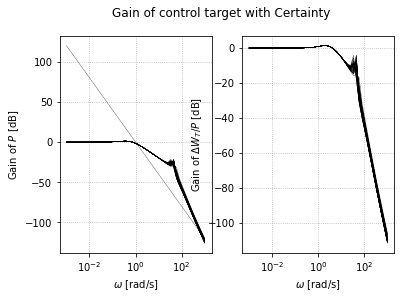

In [74]:
fig, ax = plt.subplots(1, 2)

for i in range(50):
    #不確かさをもつ制御対象
    P = _make_model(M, 0.8, 0.1, 300, 0.1, 1, 0.1,s)
    T1 = feedback(P*K1*N, 1)
    gain, _, w = bode(T1, logspace(-3, 3), Plot = False)
    ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
    T2 = feedback(P*K2*N, 1)
    gain, _, w = bode(T2, logspace(-3, 3), Plot = False)
    ax[1].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)   
gain, _, w = bode(Pn, logspace(-3, 3), Plot = False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)  
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')

fig.suptitle("Gain of control target with Certainty")
plt.show()

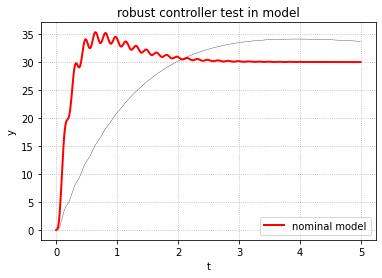

In [75]:
###設計した制御器の性能確認
fig, ax = plt.subplots()
Gyr = feedback(P*K1*N, 1)
ref = 30      #目標値30
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='k', lw=0.3)

#ノミナルモデル（不確かさなし）に対する性能
Gyr = feedback(P*K2*N, 1)
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='r', lw=2, label="nominal model")
ax.legend()
plot_set(ax, 't', 'y')

ax.set_title("robust controller test in model")
plt.show()